In [1]:
import pandas as pd
import numpy as np

In [18]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from sklearn.preprocessing import LabelEncoder

import plotly.io as pio
from IPython.display import Image

init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
print(df.shape)

(7043, 21)


In [5]:
pd.set_option('display.max_columns', 21)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df.sort_values(by=['Contract', 'Churn'],
        ascending=[True, False]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [12]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [13]:
df.sort_values(by=['Contract', 'Churn', 'InternetService'],
        ascending=[True, False, False]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
385,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75,Yes
408,4800-VHZKI,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,19.9,Yes
409,7989-CHGTL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,19.6,Yes


In [14]:
columns_to_show = ['customerID', 'InternetService', 'Contract']
df2 = df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])
df2

customerID                         InternetService                      \
           count unique         top freq           count unique          top   
Churn                                                                          
No          5174   5174  5567-GZKQY    1            5174      3          DSL   
Yes         1869   1869  4662-EKDPQ    1            1869      3  Fiber optic   

            Contract                               
       freq    count unique             top  freq  
Churn                                              
No     1962     5174      3  Month-to-month  2220  
Yes    1297     1869      3  Month-to-month  1655

In [15]:
pd.crosstab(df['Churn'], df['Contract'], margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


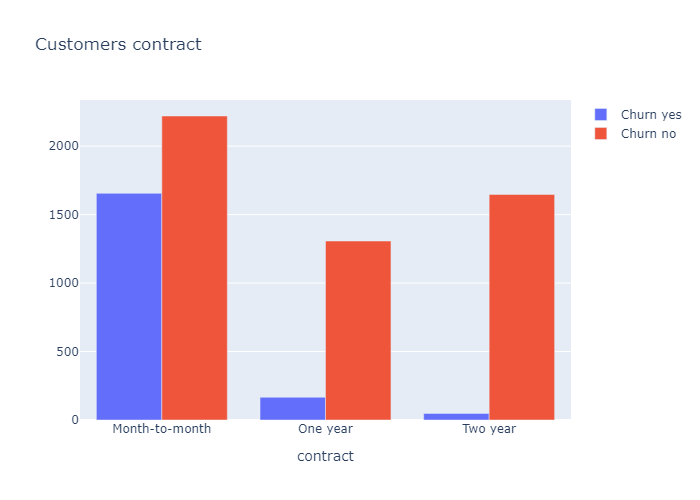

In [19]:
churn_yes = df[df['Churn'] == 'Yes'].groupby(['Contract'])[['Churn']].count()
churn_no = df[df['Churn'] == 'No'].groupby(['Contract'])[['Churn']].count()

churn_yes.columns = ['Churn']
churn_no.columns = ['Churn']

trace0 = go.Bar(
    x=churn_yes.index,
    y=churn_yes.Churn,
    name='Churn yes'
)

trace1 = go.Bar(
    x=churn_no.index,
    y=churn_no.Churn,
    name='Churn no'
)

data = [trace0, trace1]
layout = {'title': 'Customers contract', 'xaxis': {'title': 'contract'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
Image(pio.to_image(fig, format='png'))

In [17]:
pd.crosstab(df['Churn'], df['InternetService'], margins=True)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


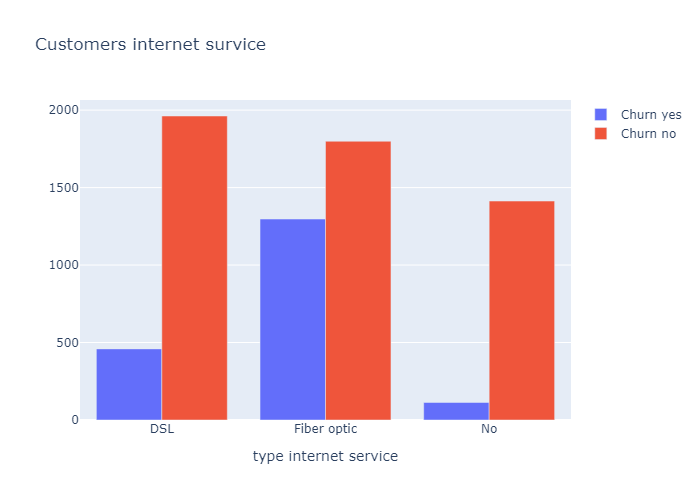

In [15]:
internet_service_yes = df[df['Churn'] == 'Yes'].groupby(['InternetService'])[['Churn']].count()
internet_service_no = df[df['Churn'] == 'No'].groupby(['InternetService'])[['Churn']].count()

internet_service_yes.columns = ['Churn']
internet_service_no.columns = ['Churn']

trace0 = go.Bar(
    x=internet_service_yes.index,
    y=internet_service_yes.Churn,
    name='Churn yes'
)

trace1 = go.Bar(
    x=internet_service_no.index,
    y=internet_service_no.Churn,
    name='Churn no'
)

data = [trace0, trace1]
layout = {'title': 'Customers internet survice', 'xaxis': {'title': 'type internet service'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
Image(pio.to_image(fig, format='png'))

In [19]:
pd.crosstab(df['Churn'], df['tenure'], margins=True)

tenure,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,All
Churn,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,...,76,67,76,88,91,87,108,164,356,5174
Yes,0,380,123,94,83,64,40,51,42,46,...,4,9,13,10,9,8,11,6,6,1869
All,11,613,238,200,176,133,110,131,123,119,...,80,76,89,98,100,95,119,170,362,7043


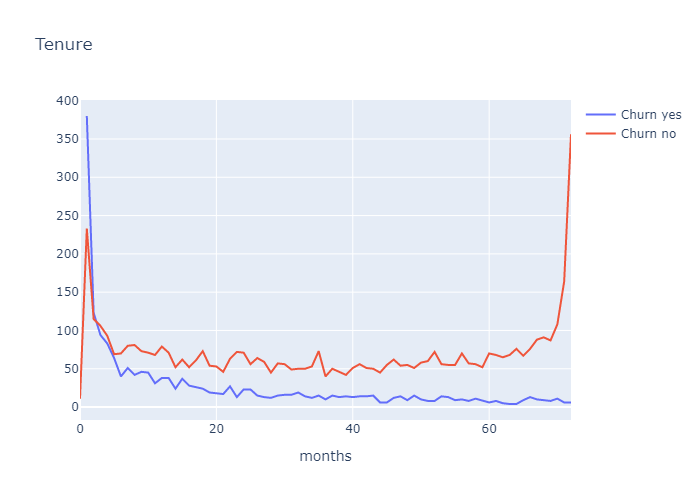

In [17]:
churn_yes = df[df['Churn'] == 'Yes'].groupby(['tenure'])[['Churn']].count()
churn_no = df[df['Churn'] == 'No'].groupby(['tenure'])[['Churn']].count()

churn_yes.columns = ['Churn']
churn_no.columns = ['Churn']

trace0 = go.Scatter(
    x=churn_yes.index,
    y=churn_yes.Churn,
    name='Churn yes'
)

trace1 = go.Scatter(
    x=churn_no.index,
    y=churn_no.Churn,
    name='Churn no'
)

data = [trace0, trace1]
layout = {'title': 'Tenure', 'xaxis': {'title': 'months'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
Image(pio.to_image(fig, format='png'))

In [21]:
label_encoder = LabelEncoder()
categorical_columns = ['tenure', 'InternetService', 'Contract', 'Churn']
main_features = df[categorical_columns]
for column in categorical_columns:
    main_features[column] = label_encoder.fit_transform(main_features[column])
main_features

,tenure,InternetService,Contract,Churn
0,1,0,0,0
1,34,0,1,0
2,2,0,0,1
3,45,0,1,0
4,2,1,0,1
...,...,...,...,...
7038,24,0,1,0
7039,72,1,1,0
7040,11,0,0,0
7041,4,1,0,1


#### First hypothesis
Initial data analysis shows that the largest outflow of users is among new users (month-to-month) and people connected through fiber optic.
#### Second hypothesis
Most outages occur in the first months of using the services.